<a href="https://colab.research.google.com/github/inesmurtagh/analisis-predictivo/blob/main/Segundo%20Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#82.05 - Analisis Predictivo 
**Segundo Examen**

Inés Murtagh

+ [Dataset](https://www.kaggle.com/competitions/ap-tp2-2q2022) 
+ Tipos de predicción: **regresión**
+ Variable target: **averageRating**

## Importación del Dataset

In [120]:
import pandas as pd
import numpy as np

In [121]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c ap-tp2-2q2022


import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
ap-tp2-2q2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [122]:
df = pd.read_csv("origen.csv", sep=",")

## Analisis Exploratorio de Datos

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *  

In [124]:
df.head()

,Id,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,...,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,video
0,0,6.0,7,tvSeries,0.0,2019,0,0,News,"nm1635586,nm1230149,nm2085337",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.9,42,tvEpisode,0.0,2011,0,46,"Comedy,Crime,Drama",nm3398609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7.8,8,tvEpisode,0.0,2016,0,45,"Documentary,History",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.2,115,tvEpisode,0.0,1992,0,30,"Comedy,Drama",nm0067621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.8,74,movie,0.0,1961,0,103,Western,nm0060430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Filas y Columnas**

In [125]:
print('Cantidad de Filas y columnas:', df.shape)

Cantidad de Filas y columnas: (977541, 31)


**Datos duplicados**

In [126]:
df.duplicated().sum()

0

No hay datos duplicados en la df

In [127]:
df.dtypes

Id                        int64
averageRating           float64
numVotes                  int64
titleType                object
isAdult                 float64
startYear                 int64
endYear                   int64
runtimeMinutes            int64
genres_x                 object
directors                object
writers                  object
seasonNumber            float64
episodeNumber           float64
ordering                float64
language                 object
attributes               object
isOriginalTitle         float64
adult                    object
budget                  float64
genres_y                 object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
status                   object
tagline                  object
video                    object
dtype: o

In [128]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [129]:
df[['startYear','endYear']][(df['endYear']!=0) & (df['endYear'] < df['startYear'])]

,startYear,endYear


No existe ninguna fecha de inicio que sea posterior a la fecha de finalización

In [130]:
df['Longevity'] = 2022 - df['startYear']
df['Longevity'] = np.where(df['Longevity'] == 2022, 0, df['Longevity'])

**Cambiar valores 0 o nulos**

*   Tratamiento de missigs

In [131]:
# Variables categóricas
df['status'].fillna('Unknown', inplace = True) 
df['genres_x'].fillna('Other', inplace = True) 
df['overview'].fillna('No overview found.', inplace = True) 
df['attributes'].fillna('Other', inplace = True) 

In [132]:
# Variables numéricas
df['budget'] = df['budget'].astype(int, errors = 'ignore')
df['revenue'] = df['revenue'].astype(int, errors = 'ignore')
df['popularity'] = df['popularity'].astype(int, errors = 'ignore')

Reemplazar nulos de budget (presupuesto) y revenue (ingresos) por la mediana (por año de filmación)

In [133]:
df['revenue'] = np.where(df['revenue'] == 0, None, df['revenue'])
df['budget'] = np.where(df['budget'] == 0, None, df['budget'])
df['popularity'] = np.where(df['popularity'] == 0, None, df['popularity'])

presupuesto = df.groupby(['startYear','titleType'])[['budget']].median()
ingresos = df.groupby(['startYear','titleType'])[['revenue']].median()
popularidad = df.groupby(['startYear','titleType'])[['popularity']].median()

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [134]:
df = df.merge(presupuesto, on=['startYear', 'titleType'], how='left')
df = df.merge(ingresos, on=['startYear', 'titleType'], how='left')
df = df.merge(popularidad, on=['startYear', 'titleType'], how='left')

In [135]:
df['budget_y'] = np.where(df['budget_y'].isnull(), 0, df['budget_y'])
df['revenue_y'] = np.where(df['revenue_y'].isnull(), 0, df['revenue_y'])
df['popularity_y'] = np.where(df['popularity_y'].isnull(), 0, df['popularity_y'])

df['budget_x'] = np.where(df['budget_x'].isnull(), df['budget_y'], 0)
df['revenue_x'] = np.where(df['revenue_x'].isnull(), df['revenue_y'], 0)
df['popularity_x'] = np.where(df['popularity_x'].isnull(), df['popularity_y'], 0)

df = df.rename(columns={'budget_x': 'budget'})
df = df.rename(columns={'revenue_x': 'revenue'})
df = df.rename(columns={'popularity_x': 'popularity'})

*   Reemplazo de ceros

In [136]:
df.genres_x = df.genres_x.replace({"0": "Other"})
df.attributes = df.attributes.replace({"0": "Other"})

df['isOriginalTitle'] = np.where(df['isOriginalTitle']>0, 1, 0)

**Creación de nuevas variables**

*   Adult

In [137]:
# creo una nueva variable para saber si es adulto o no
# la columna esta formada a partir de las variables 'isAdult' y 'adult'
df['isAdult'] = df['isAdult'].astype(int, errors = 'ignore')
df['Adult'] = np.where(df['isAdult']==1, 1, np.where(df['adult']==True , 1, 0))

# eliminar las columans 'isAdult' y 'adult'
df.drop(['isAdult'], axis=1, inplace=True)
df.drop(['adult'], axis=1, inplace=True)

*   Language

In [138]:
# crear variable Language a partir de las dos columnas que contienen idioma
df['Language'] = np.where((df['language'] == '0') , df['original_language'], np.where(df['language'] == np.NaN, df['original_language'], df['language']))
df['Language'] = df['Language'].str.upper() 

# eliminar las columans 'language' y 'original_language'
df.drop(['language'], axis=1, inplace=True)
df.drop(['original_language'], axis=1, inplace=True)

In [139]:
df['Language'] = np.where(df['Language'].isnull(), 'Other', df['Language'])

In [140]:
df['Language'].unique()

array(['Other', 'EN', 'FR', 'CN', 'ZH', 'JA', 'HI', 'IT', 'HE', 'ES',
       'NO', 'AR', 'CS', 'TH', 'NL', 'TR', 'RU', 'YI', 'DE', 'TA', 'PT',
       'KO', 'TL', 'SV', 'ID', 'DA', 'PL', 'FA', 'NB', 'RW', 'BN', 'IS',
       'RO', 'SL', 'ML', 'HU', 'FI', 'VI', 'ET', 'JV', 'XX', 'AF', 'SR',
       'MR', 'EL', 'AB', 'PA', 'BM', 'EU', 'SQ', 'LO', 'LT', 'SI', 'KA',
       'SK', 'UK', 'HR', 'BG', 'TE', 'LA', 'BS', 'UR', 'CA', 'BO', 'SM',
       'SH', 'EO', 'IU', 'NE', 'HAW', 'KU', 'WO', 'MK', 'KY', 'AM', 'MYV',
       'MS'], dtype=object)

*   Contar directores, escritores:


In [141]:
# crear la columna n_directors que cuentan la cantidad de directores
df['n_directors'] = np.where(df['directors']=='0', 0, df['directors'].str.count(',') + 1)

# crear la columnas n_writers que cuentan la cantidad de escritores
df['n_writers'] = np.where(df['writers']=='0', 0, df['writers'].str.count(',') + 1)

# reemplazar el valor 0 por 'Unknown'
df.directors = df.directors.replace({"0": "Unknown"})
df.writers = df.writers.replace({"0": "Unknown"})

*   Buena puntuacion

para aquellos que hayan tenido un numero de votos mayor al promedio

In [142]:
promedio = df['numVotes'].mean()
df['maxVotes'] = np.where((df['numVotes'] > promedio) , 1, 0)

**Encoding**

- Title Type

In [143]:
df['titleType'].unique()

array(['tvSeries', 'tvEpisode', 'movie', 'video', 'tvMiniSeries', 'short',
       'tvSpecial', 'tvMovie', 'videoGame', 'tvShort'], dtype=object)

In [144]:
df = df.drop(columns=['video'])

In [145]:
df['titleType'] = np.where((df['titleType'] == 'tvSeries') | (df['titleType'] == 'tvMiniSeries'), 'Series', 
                    np.where((df['titleType'] == 'tvMovie') | (df['titleType'] == 'movie'), 'Movie',
                    np.where((df['titleType'] == 'tvShort') | (df['titleType'] == 'short') | (df['titleType'] == 'video'), 'Short', df['titleType'])))

In [146]:
# Creamos las variables binarias
dummies = pd.get_dummies(df['titleType'])

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['titleType'])

- Genres

In [147]:
df['genres_x'].unique()

array(['News', 'Comedy,Crime,Drama', 'Documentary,History', ...,
       'Crime,Documentary,Western', 'Horror,Romance,Western',
       'Action,Reality-TV,War'], dtype=object)

**Evaluar el género con mayor rating**

Splits dataframe into rows by each value in list contained in the dataframe [(pandas)](https://gist.github.com/egeulgen/9b133fff2f6f780aff258a09bfcb1db7)

In [148]:
def splitDataFrameList(df,target_column,separator):
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new = pd.DataFrame(new_rows)
    return new

In [149]:
generos = splitDataFrameList(df[['genres_x', 'averageRating']],'genres_x', ",")
toprating = generos.groupby('genres_x')[['averageRating']].mean().sort_values(by = 'averageRating', ascending=False).head(15)

**Evaluar el género que más se repite**


In [150]:
# Creamos las variables binarias
dummies = df['genres_x'].str.get_dummies(sep=',')

In [151]:
topamount = dummies.sum().sort_values(ascending=False)
topamount = pd.DataFrame(topamount, columns = ['count']).head(15)

In [152]:
df_generos = pd.concat([toprating, topamount], axis= 1, join = 'inner')
df_generos

,averageRating,count
Documentary,7.225544,116166
Mystery,7.122674,45514
Crime,7.114119,99304
Animation,7.072944,109582
Adventure,7.055667,102828
Fantasy,7.045704,41003
Family,7.041440,71450
Drama,7.007037,319984
Action,6.942728,118527
Comedy,6.919164,304060


Estos 10 géneros son los que mejor rating y votos tienen, por lo tanto, se trabajará unicamente con estos para el armado del modelo

In [153]:
dummies = dummies[['Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']]
dummies['Documentary'] = dummies['Documentary'].astype(int)
dummies['Mystery'] = dummies['Mystery'].astype(int)
dummies['Crime'] = dummies['Crime'].astype(int)
dummies['Animation'] = dummies['Animation'].astype(int)
dummies['Adventure'] = dummies['Adventure'].astype(int)
dummies['Family'] = dummies['Family'].astype(int)
dummies['Drama'] = dummies['Drama'].astype(int)

In [154]:
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['genres_x'])

**Missing Values**

In [155]:
df.isnull().sum()

Id                           0
averageRating                0
numVotes                     0
startYear                    0
endYear                      0
runtimeMinutes               0
directors                    0
writers                      0
seasonNumber            539408
episodeNumber           539408
ordering                606699
attributes                   0
isOriginalTitle              0
budget                       0
genres_y                930236
overview                     0
popularity                   0
production_companies    930239
production_countries    930239
release_date            930307
revenue                      0
runtime                 930445
status                       0
tagline                 953733
Longevity                    0
budget_y                     0
revenue_y                    0
popularity_y                 0
Adult                        0
Language                     0
n_directors                  0
n_writers                    0
maxVotes

## Descripción estadistica de los datos

*Distribución de la variable target*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


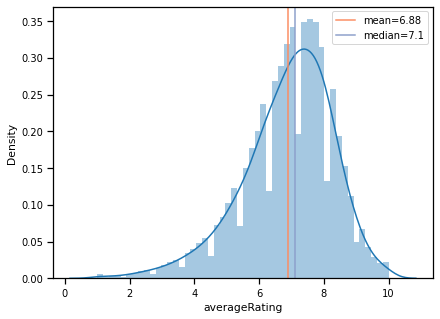

In [121]:
ratings = dict(mean=df.averageRating.mean(),
              median=df.averageRating.median())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1 = sns.distplot(df.averageRating,kde_kws=dict(bw=0.2))
ax1.axvline(x=ratings["mean"],c=sns.color_palette("Set2")[1],label=f"mean={round(ratings['mean'],2)}")
ax1.axvline(x=ratings["median"],c=sns.color_palette("Set2")[2],label=f"median={round(ratings['median'],2)}")
plt.legend()

In [38]:
df.describe()

,Id,averageRating,numVotes,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle,...,tvEpisode,tvSpecial,videoGame,Documentary,Mystery,Crime,Animation,Adventure,Family,Drama
count,977541.000000,977541.000000,9.775410e+05,977541.000000,977541.000000,977541.000000,438133.000000,438133.000000,370842.000000,977541.000000,...,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000,977541.000000
mean,488770.000000,6.881284,1.618633e+03,1999.361582,57.984245,41.390972,4.035528,55.038682,3.475165,0.000007,...,0.448214,0.008987,0.010928,0.118835,0.046560,0.101586,0.112100,0.105190,0.073092,0.327336
std,282191.924084,1.405724,2.464842e+04,34.239280,335.860575,63.656491,9.920419,580.403448,5.128331,0.002676,...,0.497311,0.094372,0.103966,0.323594,0.210694,0.302103,0.315489,0.306799,0.260287,0.469241
min,0.000000,1.000000,5.000000e+00,0.000000,0.000000,-29745.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244385.000000,6.100000,9.000000e+00,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,488770.000000,7.100000,2.200000e+01,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,733155.000000,7.900000,9.200000e+01,2015.000000,0.000000,73.000000,4.000000,16.000000,3.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,977540.000000,10.000000,2.425542e+06,2021.000000,2022.000000,14400.000000,1996.000000,15762.000000,162.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df[df['runtimeMinutes']<0]

,Id,averageRating,numVotes,startYear,endYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,...,tvEpisode,tvSpecial,videoGame,Documentary,Mystery,Crime,Animation,Adventure,Family,Drama
479124,479124,6.6,9,2011,0,-29745,nm11477589,Unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
610405,610405,5.3,55,2020,0,-22336,nm6622244,nm6622244,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0


In [84]:
# remuevo el valor minutes negativo --> inconsistencia
# no tiene sentido que hayan minutos negativos
df = df.drop(df[df['runtimeMinutes']<0].index)

### **Outliers**

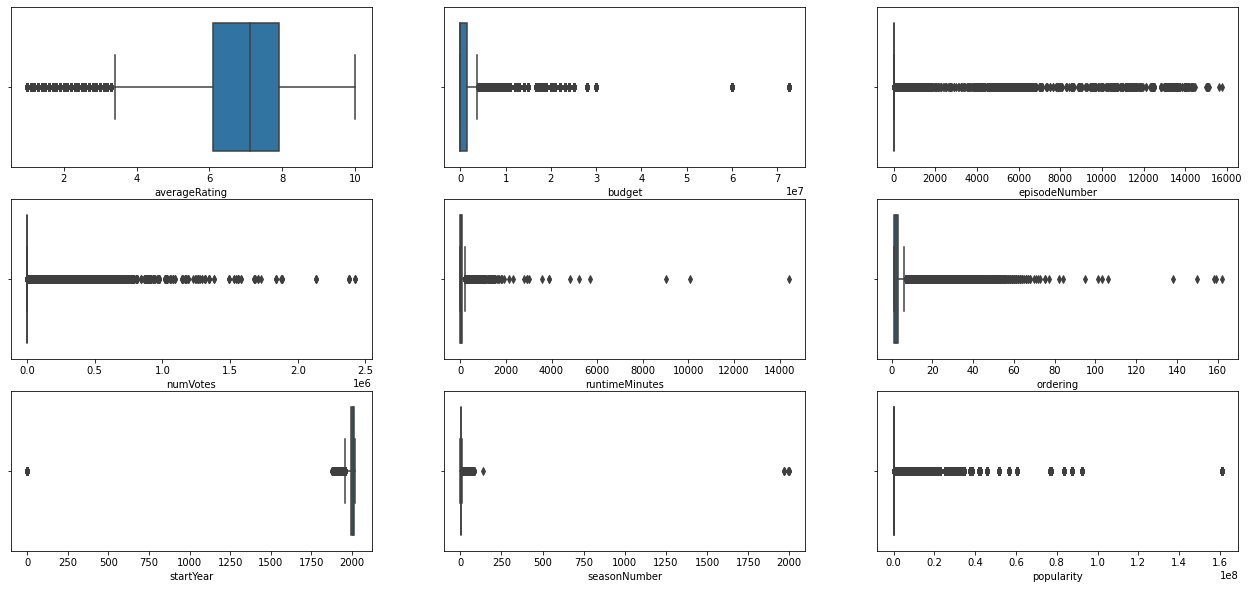

In [85]:
fig, axs = plt.subplots(3,3, figsize=(22, 10))

sns.boxplot(x=df["averageRating"],ax=axs[0,0])
sns.boxplot(x=df["numVotes"],ax=axs[1,0])
sns.boxplot(x=df["startYear"],ax=axs[2,0])
sns.boxplot(x=df["budget"],ax=axs[0,1])
sns.boxplot(x=df["revenue"],ax=axs[2,2])
sns.boxplot(x=df["runtimeMinutes"],ax=axs[1,1])
sns.boxplot(x=df["seasonNumber"],ax=axs[2,1])
sns.boxplot(x=df["episodeNumber"],ax=axs[0,2])
sns.boxplot(x=df["ordering"],ax=axs[1,2])
sns.boxplot(x=df["popularity"],ax=axs[2,2])

plt.show()

*Season Number*

In [86]:
df[df['seasonNumber']>1750].sort_values(by='seasonNumber',ascending=False).head(10)

,Id,averageRating,numVotes,startYear,endYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,...,tvEpisode,tvSpecial,videoGame,Documentary,Mystery,Crime,Animation,Adventure,Family,Drama
180282,180282,7.0,6,1996,0,24,nm0486188,"nm0486188,nm0663064",1996.0,161.0,...,1,0,0,1,0,0,1,0,0,0
684660,684660,7.6,5,1996,0,28,nm0536160,Unknown,1996.0,162.0,...,1,0,0,1,0,0,1,0,0,0
856117,856117,6.4,19,1996,0,28,nm0609741,nm0609741,1996.0,155.0,...,1,0,0,1,0,0,1,0,0,0
528039,528039,5.8,97,1994,0,27,nm0637615,nm0637615,1994.0,74.0,...,1,0,0,1,0,0,1,0,0,0
139968,139968,8.2,7,1967,0,60,nm0806293,nm0637498,1967.0,2.0,...,1,0,0,1,0,0,0,0,0,0
324692,324692,8.8,15,1966,0,60,nm0184152,"nm2354768,nm0744575",1966.0,4.0,...,1,0,0,1,0,0,0,0,0,0
777846,777846,6.6,17,1965,0,60,nm0281310,nm0281310,1965.0,2.0,...,1,0,0,1,0,0,0,0,0,0


In [87]:
df = df.drop(df[df['seasonNumber']>1750].index)

*Año de comienzo*

*'El 28 de diciembre de 1895 se realiza la primera proyección cinematográfica abierta al público'*  [Wikipedia](https://es.wikipedia.org/wiki/Historia_del_cine#:~:text=El%2028%20de%20diciembre%20de%201895%20se%20realiza%20la%20primera,experimento%20que%20no%20tiene%20futuro.)

In [88]:
df[df['startYear']<1895]

,Id,averageRating,numVotes,startYear,endYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,...,tvEpisode,tvSpecial,videoGame,Documentary,Mystery,Crime,Animation,Adventure,Family,Drama
225,225,5.4,882,1894,0,1,nm0005690,Unknown,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
4077,4077,6.3,7,0,0,0,Unknown,Unknown,10.0,73.0,...,1,0,0,0,0,0,0,0,0,0
7212,7212,4.7,17,1894,0,0,nm0005690,Unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7933,7933,4.5,28,1894,0,0,nm0005690,Unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10913,10913,4.3,36,1894,0,0,nm0005690,Unknown,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967691,967691,7.7,14,0,0,0,nm0277946,Unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
968089,968089,4.5,42,1887,0,0,nm1155956,Unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
969540,969540,8.3,12,0,0,0,"nm6960274,nm0004917","nm6960274,nm7307396",NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
972096,972096,6.8,9,0,0,0,Unknown,nm9190153,1.0,92.0,...,1,0,0,0,0,0,0,0,0,0


Se imputaran estos datos con el año 1895

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


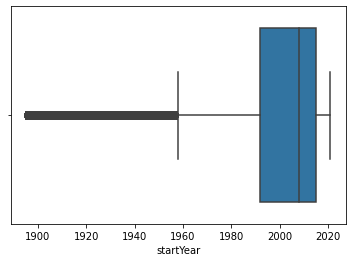

In [89]:
df['startYear'] = np.where(df['startYear']<1895, 1895, df['startYear'])
sns.boxplot(df['startYear'])

### **Correlacion**

In [118]:
copia = df[['numVotes', 'runtimeMinutes', 'Longevity', 'budget', 'popularity', 'revenue', 'maxVotes', 'Adult', 'n_directors', 'n_writers', 'Movie', 'Series', 'Short', 'tvEpisode', 'Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']]

In [119]:
copia.corr()

,numVotes,runtimeMinutes,Longevity,budget,popularity,revenue,maxVotes,Adult,n_directors,n_writers,...,Series,Short,tvEpisode,Documentary,Mystery,Crime,Animation,Adventure,Family,Drama
numVotes,1.000000,0.086129,-0.007003,-0.007770,-0.038817,-0.008877,0.277679,-0.008866,0.043006,0.038014,...,0.002927,-0.027889,-0.053456,-0.021650,0.014402,0.016509,-0.007786,0.049621,-0.006449,0.015137
runtimeMinutes,0.086129,1.000000,0.095224,0.343412,0.121802,0.319743,0.189295,0.091724,0.018971,-0.000198,...,-0.037491,-0.164127,-0.303396,0.026027,0.037114,0.057677,-0.164518,-0.044011,-0.063407,0.159569
Longevity,-0.007003,0.095224,1.000000,-0.080710,-0.117808,0.036179,-0.001368,0.024998,0.017426,0.020939,...,-0.064072,0.065803,-0.194955,-0.082085,-0.020188,0.005933,-0.011001,0.031129,0.086133,0.019743
budget,-0.007770,0.343412,-0.080710,1.000000,0.385342,0.711563,0.073936,0.035061,-0.005393,-0.062719,...,-0.082031,-0.103301,-0.406298,0.097398,-0.025747,-0.043828,-0.122060,-0.085834,-0.061735,0.067661
popularity,-0.038817,0.121802,-0.117808,0.385342,1.000000,0.300221,-0.090309,0.089571,-0.010576,-0.042083,...,-0.078200,0.059663,-0.165058,0.066583,-0.021248,-0.036011,-0.046632,-0.050747,-0.038096,-0.004871
revenue,-0.008877,0.319743,0.036179,0.711563,0.300221,1.000000,0.070558,0.011921,-0.004811,-0.046423,...,-0.115235,-0.143449,-0.366407,0.059715,-0.018955,-0.026973,-0.117046,-0.065429,-0.054781,0.081552
maxVotes,0.277679,0.189295,-0.001368,0.073936,-0.090309,0.070558,1.000000,-0.029879,0.103966,0.115623,...,0.038230,-0.079409,-0.118115,-0.057290,0.056146,0.060952,-0.019384,0.053423,-0.015567,0.087986
Adult,-0.008866,0.091724,0.024998,0.035061,0.089571,0.011921,-0.029879,1.000000,-0.011266,-0.047045,...,-0.028049,0.193151,-0.121254,-0.046726,-0.025533,-0.034171,-0.043183,-0.041787,-0.038757,-0.069837
n_directors,0.043006,0.018971,0.017426,-0.005393,-0.010576,-0.004811,0.103966,-0.011266,1.000000,0.576174,...,0.222074,-0.019346,-0.087436,-0.004826,0.007616,0.010644,0.033326,0.021146,0.011804,0.027608
n_writers,0.038014,-0.000198,0.020939,-0.062719,-0.042083,-0.046423,0.115623,-0.047045,0.576174,1.000000,...,0.160247,-0.113145,0.059178,-0.098484,0.020373,0.031234,0.033992,0.049094,0.026246,0.041564


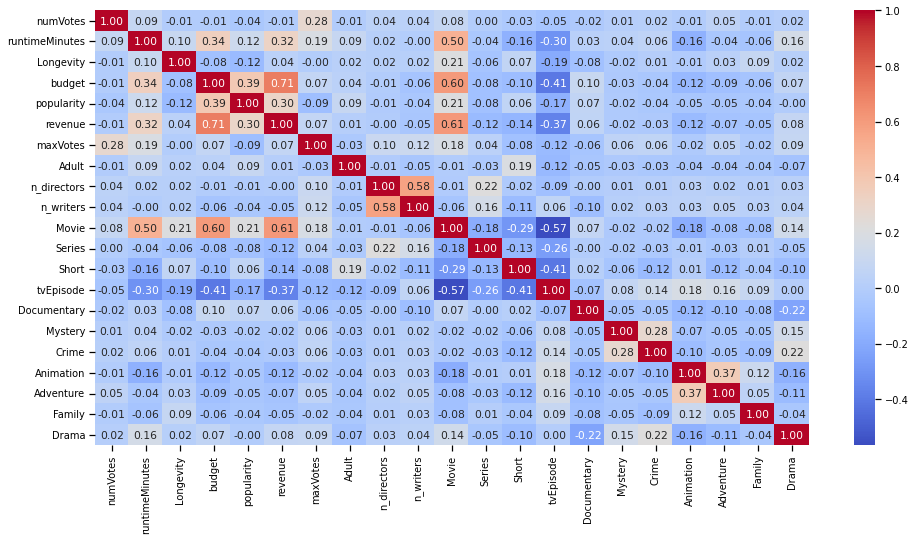

In [120]:
sns.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(ax = ax, data = copia.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

## Modelo

**Particion**

In [ ]:
from sklearn.model_selection import train_test_split

columnas = ['numVotes', 'runtimeMinutes', 'isOriginalTitle', 'Longevity', 'budget', 'popularity', 'revenue', 'Adult', 'n_directors', 'n_writers', 'Movie', 'Series', 'Short', 'tvSpecial', 'tvEpisode', 'videoGame', 'Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']
X = df[columnas]
y = df['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 21)

85% train y 15% test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(830902, 18)
(146630, 18)
(830902,)
(146630,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

In [ ]:
! pip install lightgbm
from lightgbm import LGBMRegressor

!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

#Creación de Modelos
lr = LinearRegression()
dt = DecisionTreeRegressor()
et = ExtraTreesRegressor()
rf = RandomForestRegressor()
cb = CatBoostRegressor()
lgbm = LGBMRegressor()

models = [lr, dt, et, rf, cb, lgbm]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model)
  print("\tExplained variance:", explained_variance_score(y_test, y_pred))
  print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
  print("\tR2 score:", r2_score(y_test, y_pred))
  print()

RandomForestRegressor()
	Explained variance: 0.3493592883716242
	Mean absolute error: 0.7902121652790127
	R2 score: 0.3490947843679333

Learning rate set to 0.118432
0:	learn: 1.3754844	total: 209ms	remaining: 3m 28s
1:	learn: 1.3497045	total: 355ms	remaining: 2m 57s
2:	learn: 1.3292636	total: 488ms	remaining: 2m 42s
3:	learn: 1.3132599	total: 616ms	remaining: 2m 33s
4:	learn: 1.2994681	total: 750ms	remaining: 2m 29s
5:	learn: 1.2887992	total: 874ms	remaining: 2m 24s
6:	learn: 1.2799427	total: 1.01s	remaining: 2m 22s
7:	learn: 1.2724125	total: 1.12s	remaining: 2m 19s
8:	learn: 1.2664451	total: 1.25s	remaining: 2m 18s
9:	learn: 1.2609743	total: 1.38s	remaining: 2m 16s
10:	learn: 1.2560851	total: 1.5s	remaining: 2m 15s
11:	learn: 1.2524427	total: 1.61s	remaining: 2m 12s
12:	learn: 1.2490096	total: 1.75s	remaining: 2m 12s
13:	learn: 1.2457912	total: 1.86s	remaining: 2m 10s
14:	learn: 1.2430597	total: 1.98s	remaining: 2m 9s
15:	learn: 1.2410929	total: 2.08s	remaining: 2m 8s
16:	learn: 1.23

### **Resultados**

LinearRegression()

	R2 score: 0.1713092269085501

DecisionTreeRegressor()

	R2 score: -0.05313574097121365

ExtraTreesRegressor()

	R2 score: 0.30110985101952465

RandomForestRegressor()

	R2 score: 0.3490947843679333

CatBoostRegressor()

	R2 score: 0.30972686388967297

LGBMRegressor()

	R2 score: 0.2902801105716407

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Cantidad de arboles
n_estimators = [int(x) for x in np.linspace(start = 250, stop = 300, num = 10)]

# Maxima cantidad de profundidad de los arboles
max_depth = [int(x) for x in np.linspace(40, 55, num = 5)]

# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [8, 10, 12]

# cantidad maxima de samples requeridos por nodo hoja
max_features = [3]

modelo = RandomForestRegressor(bootstrap = [True], min_samples_leaf = 3)

# Creo grid
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_split': min_samples_split}

In [ ]:
rf = RandomForestRegressor()

# Instanciar grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 0)

In [ ]:
# Fit grid search
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
# 'bootstrap': True, 'max_depth': 40, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 350
modelo = RandomForestRegressor(bootstrap = True, max_depth = 40, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 350)
modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=350)

In [ ]:
modelo.score(X_train, y_train)

0.5057241806160231

In [ ]:
modelo.score(X_test, y_test)

0.383077549250741

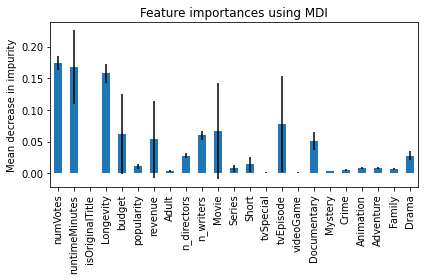

In [ ]:
# plot feature importances
importances = modelo.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelo.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columnas)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

no incluir en el análisis: IsOriginalTitle, VideoGame, tvSpecial

## Nuevo Modelo

In [90]:
from sklearn.model_selection import train_test_split

columnas = ['numVotes', 'runtimeMinutes', 'Longevity', 'budget', 'popularity', 'revenue', 'maxVotes', 'Adult', 'n_directors', 'n_writers', 'Movie', 'Series', 'Short', 'tvEpisode', 'Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']
X = df[columnas]
y = df['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [46]:
print('Cantidad de registros en entrenamiento: ', X_train.shape)
print('Cantidad de registros en testeo: ', X_test.shape)

Cantidad de registros en entrenamiento:  (830902, 21)
Cantidad de registros en testeo:  (146630, 21)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Regresión Lineal

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

*Datos del modelo de Regresión Lineal*


In [ ]:
print('Precisión del modelo:')
print(lrm.score(X_train, y_train))

Precisión del modelo:
0.17408795645785324


In [ ]:
print('Score del testeo:')
print(lrm.score(X_test, y_test))

Score del testeo:
0.17371910884352515


### Arboles de Decisión

In [ ]:
arbol = DecisionTreeRegressor(random_state = 0, max_depth = 10, min_samples_split = 50)  
arbol.fit(X_train, y_train) # fit the regressor with X and Y data 

DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=0)

In [ ]:
arbol.score(X_train,y_train)

0.27695420300998397

In [ ]:
arbol.score(X_test,y_test)

0.2684370212713896

Ajuste de parametros

In [ ]:
parameters = [{'max_depth': [20, 30, 40, 50, 70], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12]}]

a = DecisionTreeRegressor(random_state=0)
grid = GridSearchCV(a, parameters)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [20, 30, 40, 50, 70],
                          'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                          'min_samples_split': [8, 10, 12]}])

In [ ]:
grid.best_params_

{'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12}

In [ ]:
arbol = DecisionTreeRegressor(max_depth = 20, max_features = 3, min_samples_leaf = 4, min_samples_split = 12)  

In [ ]:
arbol.fit(X_train, y_train)
arbol.score(X_train,y_train)

0.3352758885925252

In [ ]:
# Score de testeo
arbol.score(X_test,y_test)

0.2777142058779398

### Random Forest

In [156]:
#'bootstrap': True, 'max_depth': 40, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 350
forest = RandomForestRegressor(bootstrap = True, max_depth = 40, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 350)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=350)

In [91]:
forest.score(X_test, y_test)

0.39393013643608166

In [157]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits=5)

scores = cross_val_score(forest, X, y, cv = k_folds)
print ("Cross Validation Scores: ", scores)
print ("Average CV Score: ", scores.mean())
print ("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.38918494 0.38690663 0.38789992 0.38804751 0.3866235 ]
Average CV Score:  0.38773249914020935
Number of CV Scores used in Average:  5


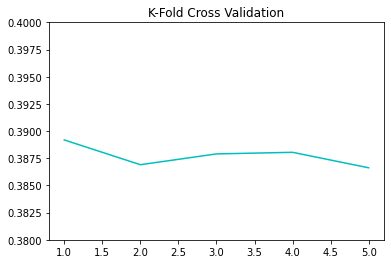

In [159]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.38, 0.40)
plt.show()

### Extra Trees

In [63]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
et = ExtraTreesRegressor(bootstrap=True).fit(X_train, y_train)

In [ ]:
print("bootstrap = True :")
print("\nScore Entrenamiento:", et.score(X_train,y_train))
print("Score Testeo:", et.score(X_test,y_test))

bootstrap = True :

Score Entrenamiento: 0.8131110540346135
Score Testeo: 0.3508902635610134


In [ ]:
et = ExtraTreesRegressor(bootstrap=False).fit(X_train, y_train)

In [ ]:
print("bootstrap = False :")
print("\nScore Entrenamiento:", et.score(X_train,y_train))
print("Score Testeo:", et.score(X_test,y_test))

bootstrap = False :

Score Entrenamiento: 0.8753895998317694
Score Testeo: 0.2840479520224818


BOOTSTRAP = TRUE obtiene un mejor R2

In [ ]:
et = ExtraTreesRegressor(bootstrap=True)

In [ ]:
parametros_et = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [None, 80, 100],
    'min_samples_split':[10, 11, 12],
    'min_samples_split': True
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_et = GridSearchCV(et, parametros_et)
grid_et.fit(X_train,y_train)

In [ ]:
print(grid_et.best_params_,'\n')
print(grid_et.best_estimator_,'\n')
print(grid_et.best_score_,'\n')

{'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 500} 

ExtraTreesRegressor(bootstrap=True, max_depth=100, min_samples_split=12,
                    n_estimators=500) 

0.3882467241503347 



In [ ]:
extra = ExtraTreesRegressor(max_depth= 100, min_samples_split=12, n_estimators=500, bootstrap=True) 
extra.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=100, min_samples_split=12,
                    n_estimators=500)

In [ ]:
extra.score(X_test,y_test)

0.3938115503175741

Con el fin de mejorar el modelo, se procederá a evaluar las variaciones en los 'scores' del parámetro max_depth

In [ ]:
fila = []

for i in range(25,35,2):
  print(i)
  extratree = ExtraTreesRegressor(max_depth=i)
  extratree.fit(X_train,y_train)
  train = extratree.score(X_train, y_train)
  test = extratree.score(X_test, y_test)
  fila.append([i, train, test])

25
27
29
31
33


In [ ]:
scores = pd.DataFrame(fila, columns=["max_depth","r2_train","r2_test"])
scores

,max_depth,r2_train,r2_test
0,25,0.370079,0.273740
1,27,0.425444,0.280341
2,29,0.492795,0.283349
3,31,0.560493,0.280733
4,33,0.621197,0.270176


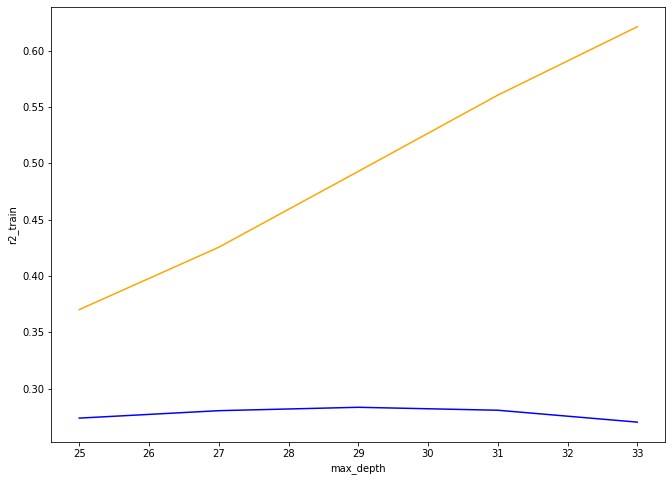

In [ ]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.lineplot(data=scores, x="max_depth", y="r2_train", color = 'orange')
ax = sns.lineplot(data=scores, x="max_depth", y="r2_test", color = 'blue')

In [64]:
extra = ExtraTreesRegressor(max_depth= 29, min_samples_split=12, n_estimators=500, bootstrap=True) 
extra.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=29, min_samples_split=12,
                    n_estimators=500)

In [65]:
extra.score(X_test,y_test)

0.3963478588194783

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits=5)

scores = cross_val_score(extra, X, y, cv = k_folds)
print ("Cross Validation Scores: ", scores)
print ("Average CV Score: ", scores.mean())
print ("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.39733526 0.3952112  0.39572818 0.39604252 0.39395425]
Average CV Score:  0.3956542832337255
Number of CV Scores used in Average:  5


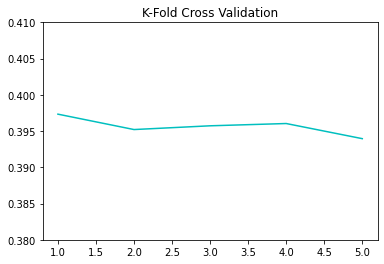

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.38, 0.41)
plt.show()


### XGBoost:

In [ ]:
! pip install xgboost pandas sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=247b41714e1b54140db71165f8969b978cc26bd544fec0ce9c1dbd5f4684c4cf
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
from xgboost import XGBRegressor

In [ ]:
from numpy import array
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from urllib.request import urlretrieve

In [ ]:
param_gridXGB = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [200, 300, 500]}

In [ ]:
model = XGBRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = param_gridXGB, cv = 3, n_jobs = 5, verbose = True)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [ ]:
xgb = XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.07, max_depth = 7, min_child_weight = 4, n_estimators = 500, nthread = 4, objective = 'reg:linear', silent = 1, subsample = 0.7)
xgb.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.07, max_depth=7,
             min_child_weight=4, n_estimators=500, nthread=4, silent=1,
             subsample=0.7)

In [ ]:
xgb.score(X_train, y_train)

0.3426550578494362

In [ ]:
xgb.score(X_test, y_test)

0.3213693046413919

### Light Gradient Boosting Machine

In [ ]:
! pip install lightgbm
from lightgbm import LGBMRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
parameters = {
                "max_depth": [None, 40, 80],
                "num_iterations": [2000,5000],
                "num_leaves": [60,70,80],
                "learning_rate": [0.05,0.1],
                "max_bin": [250, 255, 300] 
              }

In [ ]:
lgb = LGBMRegressor(boosting= "dart")
grid = GridSearchCV(lgb, parameters, cv = 3)

In [ ]:
grid.fit(X_train, y_train)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n

In [ ]:
lgbm = LGBMRegressor(boosting_type='dart', max_depth=10, learning_rate = 0.2, num_iterations = 5000, num_leaves = 60)
lgbm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMRegressor(boosting_type='dart', learning_rate=0.2, max_depth=10,
              num_iterations=5000, num_leaves=60)

In [ ]:
lgbm.score(X_test, y_test)

0.36534504680849667

### Catboost

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
parametroscb = {'depth': [10, 12, 25, 80], 'learning_rate': [0.01, 0.05, 0.1], 'iterations': [100, 500, 800]}
catboostr = CatBoostRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = catboostr, param_grid = parametroscb, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search" )
print("\n The best estimator:\n", grid.best_estimator_)
print("\n The best score:\n", grid.best_score_)
print("\n The best parameters:\n", grid.best_params_)

 Results from Grid Search

 The best estimator:

 The best score:
 0.34415788165417205

 The best parameters:
 {'depth': 12, 'iterations': 800, 'learning_rate': 0.1}


In [ ]:
# 'depth': 12, 'l2_leaf_reg': 1, 'iterations': 800, 'learning_rate': 0.1
catboost = CatBoostRegressor(depth = 12, iterations = 800, learning_rate = 0.1, l2_leaf_reg = 1)
catboost.fit(X_train, y_train)

0:	learn: 1.3747937	total: 320ms	remaining: 4m 15s
1:	learn: 1.3480445	total: 616ms	remaining: 4m 5s
2:	learn: 1.3252826	total: 925ms	remaining: 4m 5s
3:	learn: 1.3062156	total: 1.28s	remaining: 4m 14s
4:	learn: 1.2904026	total: 1.65s	remaining: 4m 22s
5:	learn: 1.2770338	total: 2.01s	remaining: 4m 25s
6:	learn: 1.2659251	total: 2.37s	remaining: 4m 28s
7:	learn: 1.2559524	total: 2.71s	remaining: 4m 28s
8:	learn: 1.2479536	total: 3.05s	remaining: 4m 28s
9:	learn: 1.2407382	total: 3.39s	remaining: 4m 27s
10:	learn: 1.2346756	total: 3.74s	remaining: 4m 27s
11:	learn: 1.2299013	total: 4.08s	remaining: 4m 27s
12:	learn: 1.2256798	total: 4.43s	remaining: 4m 28s
13:	learn: 1.2214752	total: 4.77s	remaining: 4m 27s
14:	learn: 1.2182184	total: 5.1s	remaining: 4m 27s
15:	learn: 1.2155709	total: 5.45s	remaining: 4m 26s
16:	learn: 1.2127942	total: 5.79s	remaining: 4m 26s
17:	learn: 1.2103718	total: 6.13s	remaining: 4m 26s
18:	learn: 1.2075175	total: 6.49s	remaining: 4m 26s
19:	learn: 1.2055737	tota

In [ ]:
catboost.score(X_train, y_train)

0.414120609511079

In [ ]:
catboost.score(X_test, y_test)

0.3550302209673055



---



Con el fin de mejorar el modelo, se procederá a evaluar las variaciones en los 'scores' de: depth, iterations y learning_rate

**Depth**

In [ ]:
fila = []

for i in range(10, 17, 2):
  # 'depth': 12, 'l2_leaf_reg': 1
  cbr = CatBoostRegressor(depth = i, iterations = 500, l2_leaf_reg = 1)
  cbr.fit(X_train,y_train)
  scoretrain = cbr.score(X_train, y_train)
  scoretest = cbr.score(X_test, y_test)
  fila.append([i, scoretrain, scoretest])

0:	learn: 1.3971633	total: 284ms	remaining: 2m 21s
1:	learn: 1.3881184	total: 557ms	remaining: 2m 18s
2:	learn: 1.3796453	total: 819ms	remaining: 2m 15s
3:	learn: 1.3715478	total: 1.09s	remaining: 2m 15s
4:	learn: 1.3638782	total: 1.35s	remaining: 2m 13s
5:	learn: 1.3566465	total: 1.63s	remaining: 2m 14s
6:	learn: 1.3497457	total: 1.9s	remaining: 2m 13s
7:	learn: 1.3431287	total: 2.16s	remaining: 2m 12s
8:	learn: 1.3369606	total: 2.43s	remaining: 2m 12s
9:	learn: 1.3310510	total: 2.7s	remaining: 2m 12s
10:	learn: 1.3253967	total: 2.96s	remaining: 2m 11s
11:	learn: 1.3201252	total: 3.23s	remaining: 2m 11s
12:	learn: 1.3149874	total: 3.51s	remaining: 2m 11s
13:	learn: 1.3102020	total: 3.79s	remaining: 2m 11s
14:	learn: 1.3056478	total: 4.05s	remaining: 2m 11s
15:	learn: 1.3012923	total: 4.31s	remaining: 2m 10s
16:	learn: 1.2970195	total: 4.59s	remaining: 2m 10s
17:	learn: 1.2930757	total: 4.86s	remaining: 2m 10s
18:	learn: 1.2893355	total: 5.13s	remaining: 2m 9s
19:	learn: 1.2858179	tota

In [ ]:
scores = pd.DataFrame(fila, columns=["max_depth","Score Train","Score Test"])
scores

,max_depth,Score Train,Score Test
0,10,0.313605,0.303305
1,12,0.334503,0.317227
2,16,0.390250,0.344523


depth = 16 tiene el mejor score en testeo

**Iterations**

In [ ]:
fila = []

for i in range(500,1100,100):
  # 'depth': 16, 'l2_leaf_reg': 1
  cbr = CatBoostRegressor(depth = 16, iterations = i, l2_leaf_reg = 1)
  cbr.fit(X_train,y_train)
  scoretrain = cbr.score(X_train, y_train)
  scoretest = cbr.score(X_test, y_test)
  fila.append([i, scoretrain, scoretest])

0:	learn: 1.3958366	total: 2.75s	remaining: 22m 52s
1:	learn: 1.3856888	total: 5.39s	remaining: 22m 21s
2:	learn: 1.3759685	total: 7.96s	remaining: 21m 58s
3:	learn: 1.3666746	total: 10.5s	remaining: 21m 46s
4:	learn: 1.3578314	total: 13.1s	remaining: 21m 36s
5:	learn: 1.3494394	total: 15.7s	remaining: 21m 29s
6:	learn: 1.3415533	total: 18.2s	remaining: 21m 22s
7:	learn: 1.3339651	total: 20.8s	remaining: 21m 19s
8:	learn: 1.3267729	total: 23.3s	remaining: 21m 13s
9:	learn: 1.3199301	total: 25.9s	remaining: 21m 9s
10:	learn: 1.3134120	total: 28.5s	remaining: 21m 5s
11:	learn: 1.3071810	total: 31.1s	remaining: 21m 3s
12:	learn: 1.3013043	total: 33.6s	remaining: 20m 58s
13:	learn: 1.2957773	total: 36.1s	remaining: 20m 54s
14:	learn: 1.2904232	total: 39.2s	remaining: 21m 8s
15:	learn: 1.2852577	total: 42.9s	remaining: 21m 37s
16:	learn: 1.2804997	total: 45.5s	remaining: 21m 31s
17:	learn: 1.2758738	total: 48s	remaining: 21m 25s
18:	learn: 1.2714636	total: 50.6s	remaining: 21m 20s
19:	learn

In [ ]:
scores = pd.DataFrame(fila, columns=["Iterations","Score Train","Score Test"])
scores

,Iterations,Score Train,Score Test
0,500,0.390250,0.344523
1,600,0.402027,0.350010
2,700,0.412459,0.353991
3,800,0.421990,0.357516
4,900,0.430534,0.360180
5,1000,0.437914,0.362241
6,1100,0.444689,0.364205


El R2 se maximiza en test cuando las iteraciones son 1100.

**learning_rate**

In [ ]:
fila = []

for i in range(10, 51, 10):
  # 'depth': 12, 'l2_leaf_reg': 1, 'iterations': 1100
  cbr = CatBoostRegressor(depth = 16, iterations = 1100, learning_rate = i/100, l2_leaf_reg = 1)
  cbr.fit(X_train, y_train)
  scoretrain = cbr.score(X_train, y_train)
  scoretest = cbr.score(X_test, y_test)
  learning = i/100
  fila.append([learning, scoretrain, scoretest])

0:	learn: 1.3718165	total: 3.56s	remaining: 17m 45s
1:	learn: 1.3427305	total: 8.69s	remaining: 21m 35s
2:	learn: 1.3179481	total: 16.6s	remaining: 27m 21s
3:	learn: 1.2968815	total: 24.8s	remaining: 30m 34s
4:	learn: 1.2793157	total: 32.9s	remaining: 32m 20s
5:	learn: 1.2644868	total: 39.1s	remaining: 31m 55s
6:	learn: 1.2523099	total: 42.7s	remaining: 29m 46s
7:	learn: 1.2420799	total: 45.3s	remaining: 27m 34s
8:	learn: 1.2331420	total: 48s	remaining: 25m 50s
9:	learn: 1.2250704	total: 50.6s	remaining: 24m 28s
10:	learn: 1.2185691	total: 53.3s	remaining: 23m 20s
11:	learn: 1.2127348	total: 56s	remaining: 22m 22s
12:	learn: 1.2079818	total: 58.5s	remaining: 21m 32s
13:	learn: 1.2037774	total: 1m 1s	remaining: 20m 50s
14:	learn: 1.1998742	total: 1m 3s	remaining: 20m 12s
15:	learn: 1.1955382	total: 1m 6s	remaining: 19m 40s
16:	learn: 1.1924003	total: 1m 9s	remaining: 19m 10s
17:	learn: 1.1898003	total: 1m 11s	remaining: 18m 44s
18:	learn: 1.1874343	total: 1m 14s	remaining: 18m 20s
19:	l

In [ ]:
scores = pd.DataFrame(fila, columns=["Learning Rate", "Score Train","Score Test"])
scores

,Learning Rate,Score Train,Score Test
0,0.1,0.439498,0.360044
1,0.2,0.488974,0.365286
2,0.3,0.525855,0.363391
3,0.4,0.550212,0.354119
4,0.5,0.568110,0.343944


El score de test se maximiza cuando learning_rate es igual a 0.2

Modelo con los parámetros mejorados:

In [ ]:
catboost = CatBoostRegressor(depth = 16, iterations = 1100, learning_rate = 0.2, l2_leaf_reg = 1)
catboost.fit(X_train, y_train)

0:	learn: 1.3399694	total: 2.75s	remaining: 50m 24s
1:	learn: 1.2930324	total: 5.36s	remaining: 49m 5s
2:	learn: 1.2607162	total: 7.9s	remaining: 48m 10s
3:	learn: 1.2378945	total: 10.5s	remaining: 47m 44s
4:	learn: 1.2221904	total: 13s	remaining: 47m 22s
5:	learn: 1.2113974	total: 15.5s	remaining: 47m 7s
6:	learn: 1.1997625	total: 18.1s	remaining: 47m 1s
7:	learn: 1.1935432	total: 20.6s	remaining: 46m 51s
8:	learn: 1.1887624	total: 23.1s	remaining: 46m 41s
9:	learn: 1.1844139	total: 25.6s	remaining: 46m 34s
10:	learn: 1.1809899	total: 28.2s	remaining: 46m 28s
11:	learn: 1.1769696	total: 30.7s	remaining: 46m 23s
12:	learn: 1.1750131	total: 33.2s	remaining: 46m 18s
13:	learn: 1.1726417	total: 35.8s	remaining: 46m 14s
14:	learn: 1.1692864	total: 38.3s	remaining: 46m 10s
15:	learn: 1.1660302	total: 40.9s	remaining: 46m 9s
16:	learn: 1.1639699	total: 43.4s	remaining: 46m 5s
17:	learn: 1.1620145	total: 46s	remaining: 46m 2s
18:	learn: 1.1606363	total: 48.5s	remaining: 45m 58s
19:	learn: 1.1

In [ ]:
catboost.score(X_test, y_test)

0.36537212630420535

Hubo mejora

## Modelo Ganador

Extra Trees Regressor: con un score de 39%

Los resultados finales se plasmaran en el siguiente notebook:

[Modelo Final](https://colab.research.google.com/drive/1xlKTXLMlLWRGqn9qGHClMyYLpbv6vsMU#scrollTo=-8W12ebMHQ4k)